In [92]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Set matplotlib to display plots inline
%matplotlib inline

In [4]:
#Load the dataset
data = pd.read_csv('C:/Users/ThinkPad/Desktop/Python/Portofolio Projects/IT Online/Project 2 - Environmental Toxin Analysis in River Systems/National_River_Toxin_Dataset_1.csv')

#Display the first few rows
data.head()

,Date,River_System,pH_Level,Temperature,Lead,Mercury,Arsenic,Nitrates,Phosphates,Dissolved_Oxygen
0,2018-01-01,Amazon,7.030015,19.136212,2.500401,0.465454,3.578886,11.627614,0.522167,7.830196
1,2018-01-01,Nile,7.421766,21.406824,3.469443,0.859716,5.352155,10.538171,0.510465,8.130328
2,2018-01-01,Yangtze,7.133612,18.419902,3.806935,0.824085,5.277814,7.865033,0.585096,8.120874
3,2018-01-01,Mississippi,7.863001,18.014871,3.438131,0.500597,3.473881,11.143068,0.438248,6.853816
4,2018-01-01,Danube,7.527686,16.622289,2.188210,0.424178,2.454209,8.043467,0.422244,8.197925


In [10]:
# Check the shape
data.shape

(1305, 10)

In [12]:
# Display data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1305 non-null   object 
 1   River_System      1305 non-null   object 
 2   pH_Level          1278 non-null   float64
 3   Temperature       1278 non-null   float64
 4   Lead              1285 non-null   float64
 5   Mercury           1278 non-null   float64
 6   Arsenic           1279 non-null   float64
 7   Nitrates          1265 non-null   float64
 8   Phosphates        1282 non-null   float64
 9   Dissolved_Oxygen  1284 non-null   float64
dtypes: float64(8), object(2)
memory usage: 102.1+ KB


In [14]:
# Descriptive Statistics
data.describe()

,pH_Level,Temperature,Lead,Mercury,Arsenic,Nitrates,Phosphates,Dissolved_Oxygen
count,1278.000000,1278.000000,1285.000000,1278.000000,1279.000000,1265.000000,1282.000000,1284.000000
mean,7.353247,20.041668,3.011035,0.596108,3.597916,10.038789,0.497162,8.023795
std,0.349114,4.063638,0.874431,0.175150,0.992052,2.096641,0.106304,1.064190
min,6.465087,9.891618,0.551349,0.157117,1.485608,2.025075,0.144044,5.041394
25%,7.101324,16.813976,2.366298,0.462683,2.836160,8.701188,0.422006,7.269386
50%,7.339326,20.039121,3.000714,0.599186,3.511678,10.089112,0.497631,8.007448
75%,7.585733,23.358634,3.676560,0.734863,4.298946,11.391686,0.572888,8.740828
max,8.392902,30.749449,5.800963,1.057494,6.232902,16.547073,0.870007,11.228677


In [16]:
# Check for missing values
data.isnull().sum()

Date                 0
River_System         0
pH_Level            27
Temperature         27
Lead                20
Mercury             27
Arsenic             26
Nitrates            40
Phosphates          23
Dissolved_Oxygen    21
dtype: int64

In [22]:
# Fill missing values in numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data.isnull().sum()

Date                0
River_System        0
pH_Level            0
Temperature         0
Lead                0
Mercury             0
Arsenic             0
Nitrates            0
Phosphates          0
Dissolved_Oxygen    0
dtype: int64

In [24]:
# Convert the 'date' column to datatime
data['Date'] = pd.to_datetime(data['Date'])


In [31]:
# Calculate the average levels of toxines
average_toxin_levels = data.groupby('River_System')[['Lead', 'Mercury', 'Arsenic']].mean()
print(f'Average Toxin Levels: \n {average_toxin_levels}')


Average Toxin Levels: 
                   Lead   Mercury   Arsenic
River_System                              
Amazon        2.030662  0.493555  3.021498
Danube        2.544912  0.397276  2.517318
Mississippi   3.478198  0.598506  3.492969
Nile          2.990203  0.706638  3.987877
Yangtze       4.011200  0.784567  4.969918


In [33]:
#Identify top polluted rivers by average Lead levels
top_polluted_rivers = data.groupby('River_System')['Lead'].mean().sort_values(ascending=False)
print(f'Top Polluted Rivers by Lead Levels: \n {top_polluted_rivers.head(5)}')


Top Polluted Rivers by Lead Levels: 
 River_System
Yangtze        4.011200
Mississippi    3.478198
Nile           2.990203
Danube         2.544912
Amazon         2.030662
Name: Lead, dtype: float64


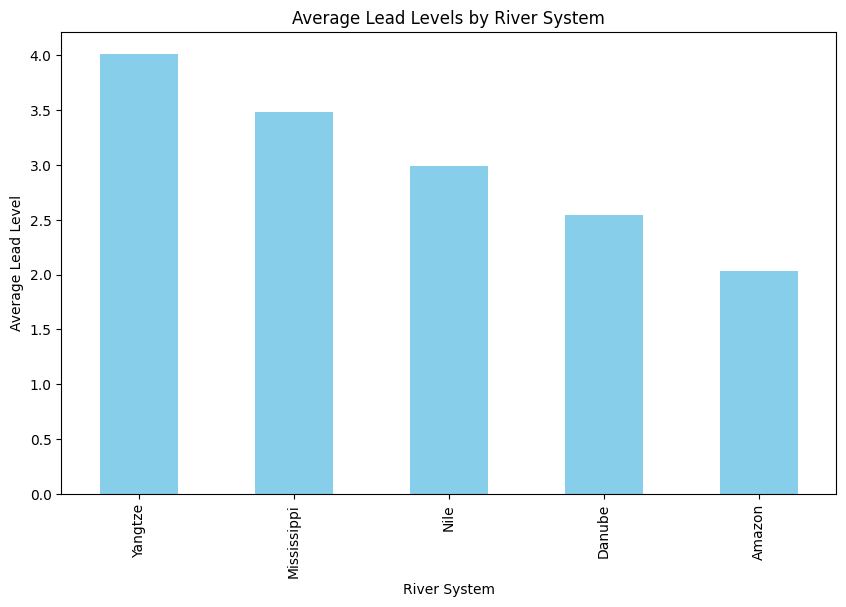

In [39]:
# Bar chart for average Lead Levels per river
plt.figure(figsize=(10,6))
top_polluted_rivers.plot(kind='bar', color='skyblue')
plt.title('Average Lead Levels by River System')
plt.xlabel('River System')
plt.ylabel('Average Lead Level')
plt.show()

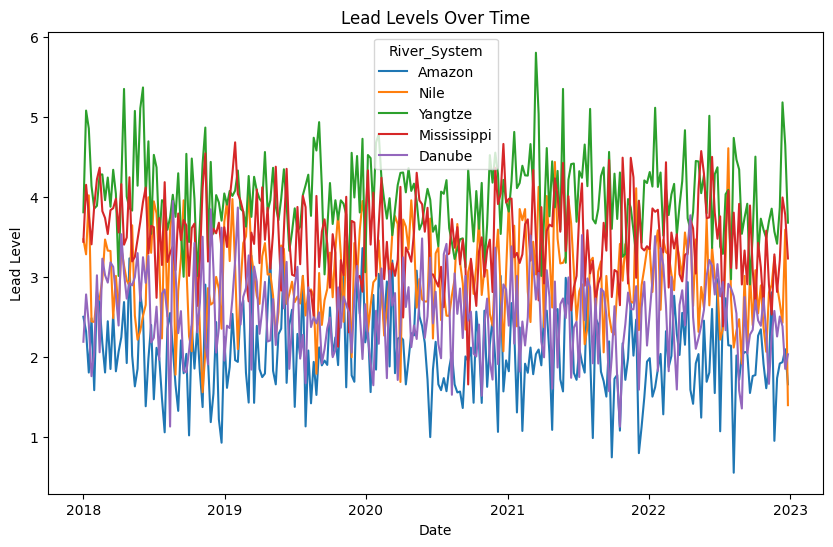

In [43]:
# Line graph for toxin Levels over time
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Lead', data=data, hue='River_System', errorbar=None)
plt.title('Lead Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Lead Level')
plt.show()

In [59]:
# Compute the correlation matrix using numeric columns
corr_matrix = data[numeric_columns].corr()
print(corr_matrix)

                  pH_Level  Temperature      Lead   Mercury   Arsenic  \
pH_Level          1.000000     0.167589  0.319700  0.137656  0.042514   
Temperature       0.167589     1.000000  0.124512  0.160928  0.044863   
Lead              0.319700     0.124512  1.000000  0.538168  0.566595   
Mercury           0.137656     0.160928  0.538168  1.000000  0.685925   
Arsenic           0.042514     0.044863  0.566595  0.685925  1.000000   
Nitrates          0.082121     0.246166  0.029522  0.062318  0.034924   
Phosphates        0.089348     0.314542 -0.000937  0.005734 -0.004483   
Dissolved_Oxygen -0.058682    -0.279058 -0.027448 -0.001926  0.020435   

                  Nitrates  Phosphates  Dissolved_Oxygen  
pH_Level          0.082121    0.089348         -0.058682  
Temperature       0.246166    0.314542         -0.279058  
Lead              0.029522   -0.000937         -0.027448  
Mercury           0.062318    0.005734         -0.001926  
Arsenic           0.034924   -0.004483         

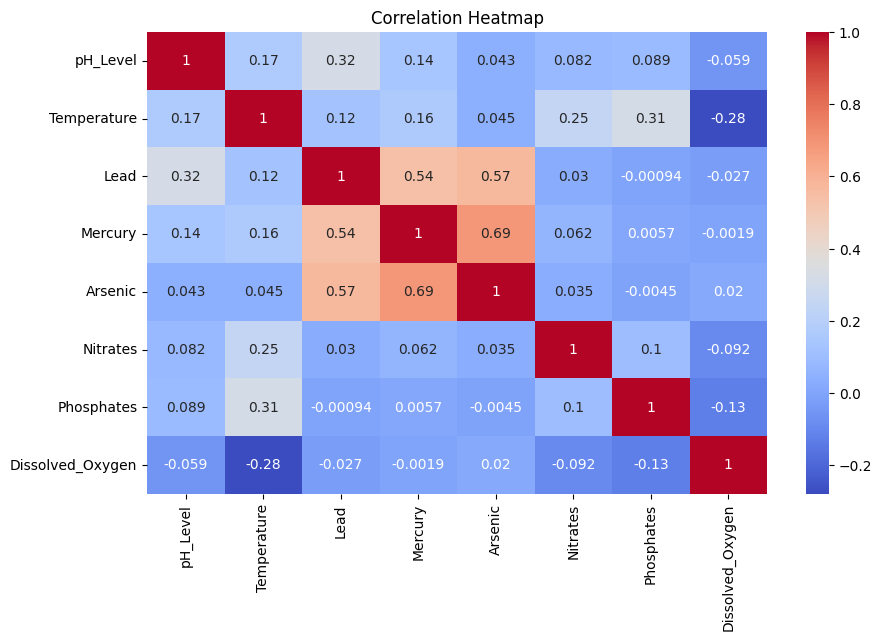

In [61]:
# Heatmap for correlation between different parameters
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [77]:
# Create a 'Season' column
data['Month'] = data['Date'].dt.month

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['Season'] = data['Month'].apply(get_season)

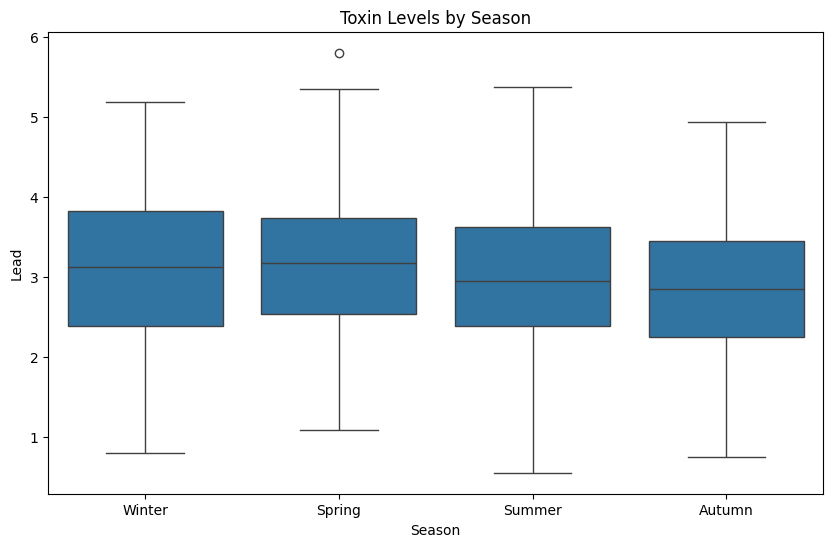

In [81]:
# Box plot of toxin levels by season
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Lead', data=data)
plt.title('Toxin Levels by Season')
plt.show()

In [85]:
# T-test between two river system (Amazon and Nile)
amazon_data = data[data['River_System'] == 'Amazon']['Lead']
nile_data = data[data['River_System'] == 'Nile']['Lead']

# Perform the t-test 
t_stat, p_value = stats.ttest_ind(amazon_data, nile_data)

# Display the results
print(f'T-test between Amazon and Nile: T-Statistic = {t_stat}, P-value = {p_value}')


T-test between Amazon and Nile: T-Statistic = -20.23821779031797, P-value = 1.3375120881428664e-67


In [98]:
# Linear regression analysis for toxin Levels and pH
x = data[['pH_Level']]
y = data[['Lead']]
model = LinearRegression()
model.fit(x, y)
print(f'Linear Regression Coefficients: {model.coef_}')
print(f'Linear Regression Intercept: {model.intercept_}')


Linear Regression Coefficients: [[0.80294889]]
Linear Regression Intercept: [-2.89324669]
